# Eliminación Gaussiana con sustitución hacia atrás

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from src import eliminacion_gaussiana

Ab = [[4, 1, 2, 9.], [2, 4, -1, -5], [1, 1, -3, -9.]]

eliminacion_gaussiana(Ab)

[06-24 17:42:27][INFO] 2025-06-24 17:42:27.712180
[06-24 17:42:27][INFO] 
[[ 1.  1. -3. -9.]
 [ 0.  2.  5. 13.]
 [ 0. -3. 14. 45.]]
[06-24 17:42:27][INFO] 
[[ 1.   1.  -3.  -9. ]
 [ 0.   2.   5.  13. ]
 [ 0.   0.  21.5 64.5]]


array([ 1., -1.,  3.])

In [8]:
%autoreload 2
from src import eliminacion_gaussiana, gauss_jordan 

Ab = [[2, 1, -1, 1, -3, 7], [1, 0, 2, -1, 1, 2], [0, -2, -1, 1, -1, -5], [3, 1, -4, 0, 5, 6], [1, -1, -1, -1, 1, 3]]

#print("Elimiacion gaussiana:")
#eliminacion_gaussiana(Ab)
print("\nGauss-Jordan:")
gauss_jordan(Ab)


Gauss-Jordan:
[06-24 17:48:41][INFO] 
[[  1   0   2  -1   1   2]
 [  0   1  -5   3  -5   3]
 [  0  -2  -1   1  -1  -5]
 [  0   1 -10   3   2   0]
 [  0  -1  -3   0   0   1]]
[06-24 17:48:41][INFO] 
[[  1   0   2  -1   1   2]
 [  0   1  -5   3  -5   3]
 [  0   0 -11   7 -11   1]
 [  0   0  -5   0   7  -3]
 [  0   0  -8   3  -5   4]]
[06-24 17:48:41][INFO] 
[[  1   0   0  -1   3   0]
 [  0   1   0   3 -12   6]
 [  0   0  -5   0   7  -3]
 [  0   0   0   7 -26   7]
 [  0   0   0   3 -16   8]]
[06-24 17:48:41][INFO] 
[[  1   0   0   0  -2   2]
 [  0   1   0   0   4  -2]
 [  0   0  -5   0   7  -3]
 [  0   0   0   3 -16   8]
 [  0   0   0   0  11 -11]]
[06-24 17:48:41][INFO] 
[[  1   0   0   0   0   0]
 [  0   1   0   0   0   2]
 [  0   0  -5   0   0   4]
 [  0   0   0   3   0  -8]
 [  0   0   0   0  11 -11]]


array([ 0.        ,  2.        , -0.8       , -2.66666667, -1.        ])

# Soluciones infinitas
El siguiente sistema de ecuaciones tiene soluciones infinitas:

|   |   |   |   |
|---|---|---|---|
| 1 | 1 | 1 | 4 |
| 2 | 2 | 1 | 6 |
| 1 | 1 | 2 | 6 |




In [ ]:
# %load_ext autoreload
%autoreload 2
from src import eliminacion_gaussiana

Ab = [[1, 1, 1, 4], [2, 2, 1, 6], [1, 1, 2, 6]]

eliminacion_gaussiana(Ab)

[06-24 16:45:13][INFO] 
[[ 1  1  1  4]
 [ 0  0 -1 -2]
 [ 0  0  1  2]]


ValueError: No existe solución única.

# Sin solución
El siguiente sistema de ecuaciones no tiene solución:

|   |   |   |   |
|---|---|---|---|
| 1 | 1 | 1 | 4 |
| 2 | 2 | 1 | 4 |
| 1 | 1 | 2 | 6 |

In [ ]:
# %load_ext autoreload
%autoreload 2
from src import eliminacion_gaussiana

Ab = [[1, 1, 1, 4], [2, 2, 1, 4], [1, 1, 2, 6]]

eliminacion_gaussiana(Ab)

[06-24 16:45:30][INFO] 
[[ 1  1  1  4]
 [ 0  0 -1 -4]
 [ 0  0  1  2]]


ValueError: No existe solución única.

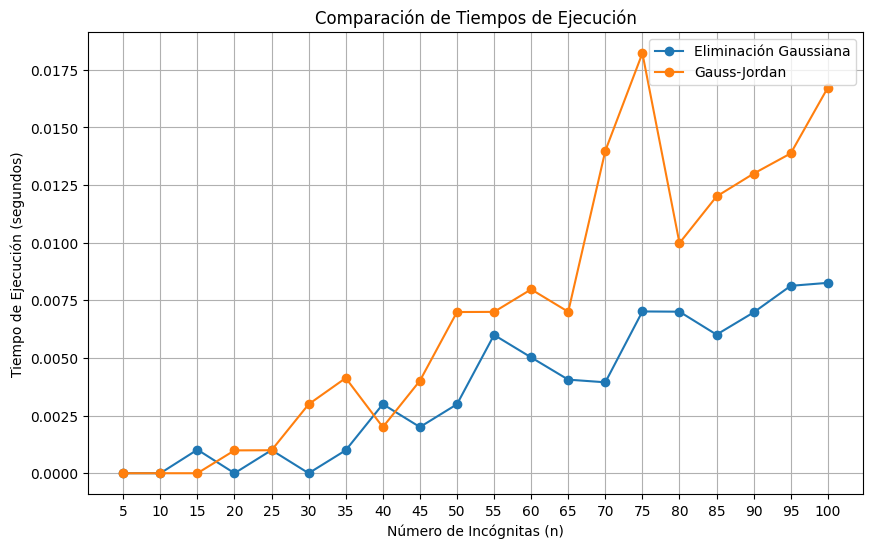

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time
# Aquí deberías definir la función eliminacion_gaussiana
def eliminacion_gaussiana(A: np.ndarray) -> np.ndarray:
    """Implementación del método de eliminación gaussiana."""
    n = A.shape[0]
    for i in range(n):
        # Hacer que el pivote sea 1
        A[i] = A[i] / A[i, i]
        for j in range(i + 1, n):
            A[j] = A[j] - A[i] * A[j, i]
    return A[:, -1]  # Retorna la última columna como solución
def gauss_jordan(A: np.ndarray) -> np.ndarray:
    """Implementación del método de Gauss-Jordan."""
    n = A.shape[0]
    for i in range(n):
        # Hacer que el pivote sea 1
        A[i] = A[i] / A[i, i]
        for j in range(n):
            if i != j:
                A[j] = A[j] - A[i] * A[j, i]
    return A[:, -1]  # Retorna la última columna como solución
def medir_tiempo(funcion, A: np.ndarray) -> float:
    """Mide el tiempo de ejecución de una función."""
    start_time = time.time()
    funcion(A)
    return time.time() - start_time
# Tamaños de las matrices (n)
n_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]  # Puedes cambiar estos valores a cualquier n que desees
tiempos_gaussiana = []
tiempos_gauss_jordan = []
for n in n_values:
    # Generar una matriz aleatoria y un vector de términos independientes
    A = np.random.rand(n, n + 1)  # Matriz aumentada
    # Medir tiempo para eliminación gaussiana
    tiempo_gaussiana = medir_tiempo(eliminacion_gaussiana, A.copy())
    tiempos_gaussiana.append(tiempo_gaussiana)
    # Medir tiempo para Gauss-Jordan
    tiempo_gauss_jordan = medir_tiempo(gauss_jordan, A.copy())
    tiempos_gauss_jordan.append(tiempo_gauss_jordan)
# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(n_values, tiempos_gaussiana, marker='o', label='Eliminación Gaussiana')
plt.plot(n_values, tiempos_gauss_jordan, marker='o', label='Gauss-Jordan')
plt.title('Comparación de Tiempos de Ejecución')
plt.xlabel('Número de Incógnitas (n)')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.xticks(n_values)
plt.legend()
plt.grid()
plt.show()

Explicacion: Es mejor el metodo de eliminacion gaussiana esto se debe a que su tiempo de ejecucion es menor en comparacion con el de gauss-jordan, conforme se van teniendo mas variables se puede observar como cada uno cambia.